# **Importing Libraries**
### In this step, I imported necessary libraries for data manipulation (PandasNumPy), data visualization (Seaborn, Matplotlib, Plotly Express).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **Reading and Exploring Data**
### This step involves loading the penguin dataset from a CSV file into a Pandas DataFrame (p). The subsequent lines display the shape of the DataFrame, provide information about its columns and data types, show the first few rows, and display summary statistics and the count of missing values.

In [ ]:
p=pd.read_csv('/content/penguins_size.csv')
p.shape

(344, 7)

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
p.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
p.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
p.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Drops rows with missing values in the DataFrame (p). This step is done to ensure that the data used for visualization and analysis is complete.

In [ ]:
p.dropna(inplace=True)

# **EDA(Exploratory Data Analysis)**

## **Pie Chart for Penguin Species Distribution**
### This code generates a pie chart using  to visualize the distribution of penguin species in the dataset.

In [ ]:
import plotly.express as px


fig = px.pie(
    values=p['species'].value_counts(),
    names=p['species'].unique(),
    template='plotly_dark',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Set3,
)

fig.update_layout(
    title_text='Penguin Species Distribution',
    title_x=0.5,
    title_font=dict(size=25),
    paper_bgcolor='rgba(0,0,0,0)',
    font_color='white',
    legend_title='Species',
    legend_title_font=dict(size=10),
    legend_font=dict(size=14),
)


fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextfont=dict(size=16)
)

fig.update_layout(showlegend=False)


fig.show()


## **Bar Chart for Penguin Distribution by Island**
### This code generates a horizontal bar chart to show the distribution of penguins on different islands.

In [ ]:

fig = px.bar(
    p.island.value_counts(),
    color=p.island.value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Set3,
    template='plotly_dark',
    orientation='h',
)


fig.update_layout(
    title_text='Penguin Distribution by Island',
    title_x=0.5,
    title_font=dict(size=25, color='white'),
    paper_bgcolor='rgba(0,0,0,0)',
    font_color='white',
    showlegend=False,
    xaxis_title='Count',
    yaxis_title='Island',
    xaxis=dict(
        title=dict(
            text='Count',
            font=dict(size=18)
        ),
        tickfont=dict(size=18),
    ),
    yaxis=dict(
        title=dict(
            text='Island',
            font=dict(size=18)
        ),
        tickfont=dict(size=18),
    ),
)


fig.update_traces(textfont=dict(size=14))


fig.show()


## **Pie Chart for Penguin Gender Distribution**
### This code creates a pie chart  to display the distribution of penguin genders in the dataset.

In [ ]:

fig = px.pie(
    values=p['sex'].value_counts(),
    names=p['sex'].unique(),
    template='plotly_dark',
    hole=0.4,
    color_discrete_sequence=['lightgreen', 'pink'],
)


fig.update_layout(
    title_text='Penguin Gender Distribution',
    title_x=0.5,
    title_font=dict(size=25, color='white'),
    paper_bgcolor='rgba(0,0,0,0)',
    font_color='white',
    legend_title='Species',
    legend_title_font=dict(size=16),
    legend_font=dict(size=14),
)


fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    insidetextfont=dict(size=16)
)

fig.update_layout(showlegend=False)

fig.show()


## **Distribution and Box Plots for Penguin Features**
### The code uses Plotly Express in Python to create histograms with box plots for penguin dataset features, including culmen length, depth, flipper length, and body mass. Each plot is enhanced  distinct color sequences, providing insightful visualizations of the data's distribution.

In [ ]:
fig_culmen_length = px.histogram(
    p,
    x='culmen_length_mm',
    color_discrete_sequence=['lightblue'],
    template='plotly_dark',
    marginal='box',
)
fig_culmen_length.update_layout(title_text='Distribution and Box Plot for Culmen Length (mm)')

fig_culmen_depth = px.histogram(
    p,
    x='culmen_depth_mm',
    color_discrete_sequence=['lightgreen'],
    template='plotly_dark',
    marginal='box',
)
fig_culmen_depth.update_layout(title_text='Distribution and Box Plot for Culmen Depth (mm)')

fig_flipper_length = px.histogram(
    p,
    x='flipper_length_mm',
    color_discrete_sequence=['lightcoral'],
    template='plotly_dark',
    marginal='box',
)
fig_flipper_length.update_layout(title_text='Distribution and Box Plot for Flipper Length (mm)')

fig_body_mass = px.histogram(
    p,
    x='body_mass_g',
    color_discrete_sequence=['lightgoldenrodyellow'],
    template='plotly_dark',
    marginal='box',
)
fig_body_mass.update_layout(title_text='Distribution and Box Plot for Body Mass (g)')

figure_height = 600
figure_width = 1200

fig_culmen_length.update_layout(height=figure_height, width=figure_width)
fig_culmen_depth.update_layout(height=figure_height, width=figure_width)
fig_flipper_length.update_layout(height=figure_height, width=figure_width)
fig_body_mass.update_layout(height=figure_height, width=figure_width)

fig_culmen_length.show()
fig_culmen_depth.show()
fig_flipper_length.show()
fig_body_mass.show()


## **Pairwise Correlation Matrix**
### **This code calculates and visualizes the pairwise correlation matrix of numerical features using Seaborn's heatmap.**

<ipython-input-113-992b4e4b46c7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



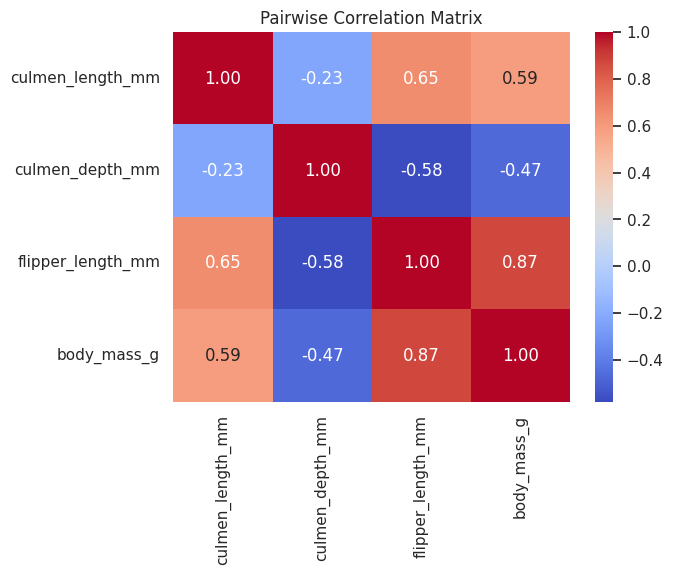

In [ ]:
correlation_matrix = p.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Correlation Matrix')
plt.show()


## **Box Plot for Culmen Length by Species**
### **This code generates a box plot using Plotly Express to illustrate the distribution of culmen length among different penguin species.**

In [ ]:
import plotly.express as px

fig = px.box(p, x='species', y='culmen_length_mm', title='Culmen Length Distribution by Species',
             labels={'culmen_length_mm': 'Culmen Length (mm)', 'species': 'Species'},
             template='plotly_dark', color='species',
             color_discrete_sequence=px.colors.qualitative.Set3)

title_font_size = 20
axis_title_font_size = 18
tick_font_size = 16

fig.update_layout(
    title_x=0.5,
    title=dict(text='Culmen Length Distribution by Species', font=dict(size=title_font_size)),
    xaxis=dict(
        title=dict(text='Species', font=dict(size=axis_title_font_size)),
        tickfont=dict(size=tick_font_size),
    ),
    yaxis=dict(
        title=dict(text='Culmen Length (mm)', font=dict(size=axis_title_font_size)),
        tickfont=dict(size=tick_font_size),
    ),
    height=700,
    width=1200
)

fig.show()


## **3D Scatter Plot for Culmen Length, Flipper Length, and Body Mass by Island**
### **This section creates a 3D scatter plot using Plotly Express to visualize the relationships between culmen length, flipper length, and body mass, with points colored by the island.**

In [ ]:
import plotly.express as px

fig = px.scatter_3d(p, x='culmen_length_mm', y='flipper_length_mm', z='body_mass_g',
                    color='island', title='Culmen Length vs. Flipper Length by Island (3D)',
                    labels={'culmen_length_mm': 'Culmen Length (mm)',
                            'flipper_length_mm': 'Flipper Length (mm)',
                            'body_mass_g': 'Body Mass (g)'},
                    template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Set2)

# Increase font sizes
title_font_size = 20
axis_title_font_size = 18
tick_font_size = 16
legend_font_size = 16

fig.update_layout(
    height=800,
    width=1000,
    title=dict(text='Culmen Length vs. Flipper Length by Island (3D)', font=dict(size=title_font_size)),
    title_x=0.5,
    scene=dict(
        xaxis=dict(
            title=dict(text='Culmen Length (mm)', font=dict(size=18)),
            tickfont=dict(size=13),
        ),
        yaxis=dict(
            title=dict(text='Culmen Depth (mm)', font=dict(size=16)),
            tickfont=dict(size=13),
        ),
        zaxis=dict(
            title=dict(text='Flipper Length (mm)', font=dict(size=16)),
            tickfont=dict(size=13)
        ),
    ),
    legend=dict(font=dict(size=16)),
)

fig.show()



## **Violin Plot for Body Mass by Sex**
###This code utilizes Seaborn to create a violin plot illustrating the distribution of body mass based on gender.

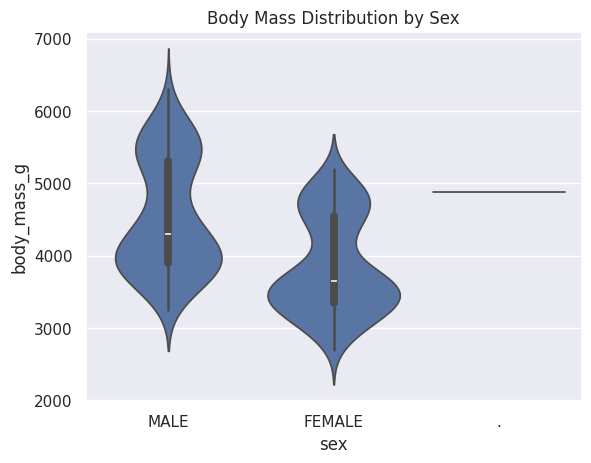

In [ ]:

sns.violinplot(x='sex', y='body_mass_g', data=p)
plt.title('Body Mass Distribution by Sex')
plt.show()


## **Pair Plot Colored by Species**
### In this segment, a pair plot is generated using Seaborn to visualize the relationships between numerical features. The plot is colored based on different penguin species.

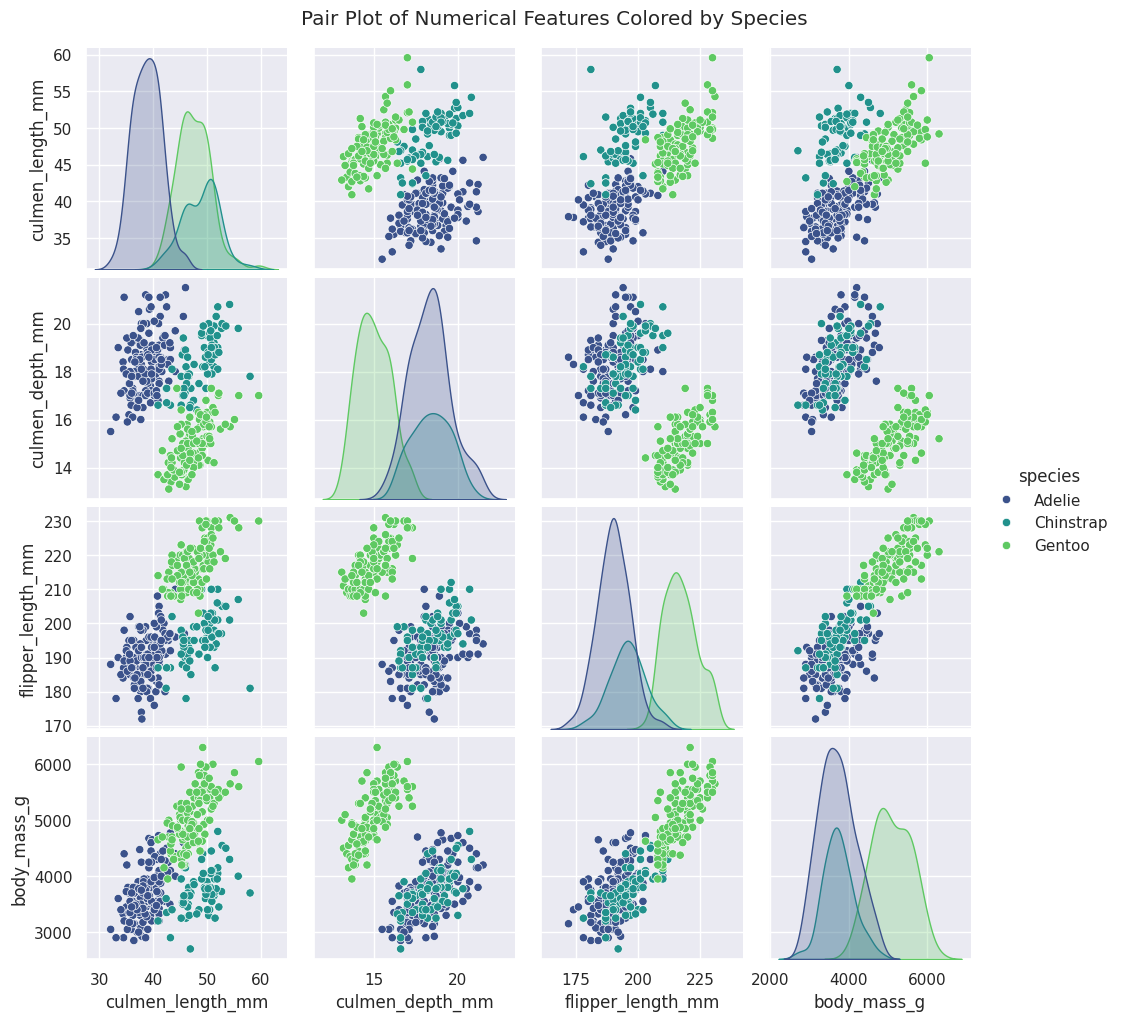

In [ ]:
sns.pairplot(p, hue='species', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features Colored by Species', y=1.02)
plt.show()

## **Pair Plot Colored by Sex**
### Similarly, another pair plot is created, but this time, the plots are colored based on gender.

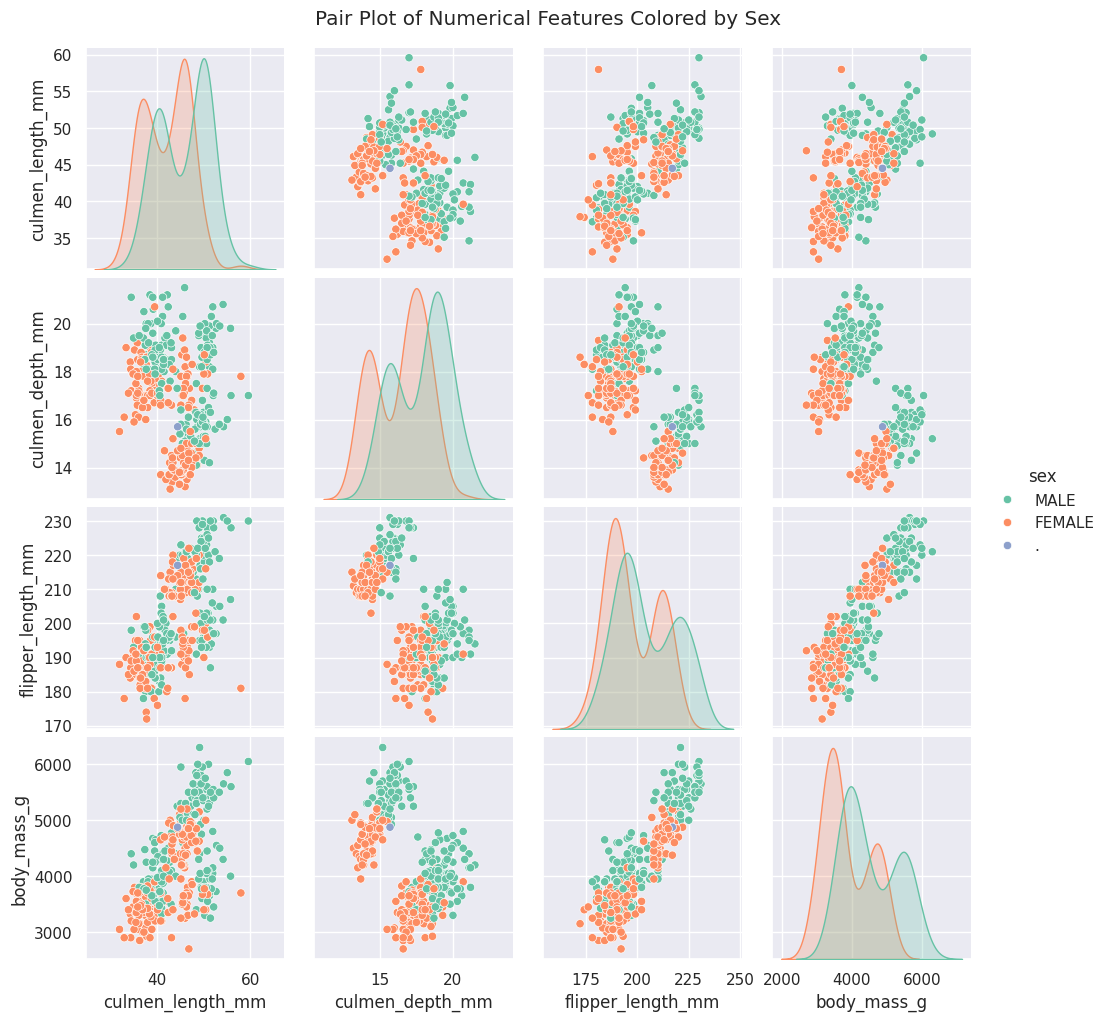

In [ ]:

sns.pairplot(p, hue='sex', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features Colored by Sex', y=1.02)
plt.show()

### Here, two scatter matrices are created using Plotly Express, each representing the relationships between numerical features. The points in the scatter plots are colored based on either species or gender.

In [ ]:

fig_species = px.scatter_matrix(p, dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                               color='species', title='Pair Plot of Numerical Features Colored by Species',
                               labels={'species': 'Species'}, template='plotly_dark',
                               color_discrete_sequence=px.colors.sequential.Viridis)

fig_species.update_layout(
    height=800,
    width=1600
)
fig_species.show()
fig_sex = px.scatter_matrix(p, dimensions=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                            color='sex', title='Pair Plot of Numerical Features Colored by Sex',
                            labels={'sex': 'Sex'}, template='plotly_dark',
                            color_discrete_sequence=px.colors.qualitative.Set2)

fig_sex.update_layout(
    height=800,
    width=1600
)
fig_sex.show()


## **3D Scatter Plot of Numerical Features by Species**
###This code generates a 3D scatter plot using Plotly Express to showcase the relationships between three numerical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm) across different penguin species.

In [ ]:
fig_3d = px.scatter_3d(p, x='culmen_length_mm', y='culmen_depth_mm', z='flipper_length_mm', color='species',
                       title='3D Scatter Plot of Numerical Features by Species', template='plotly_dark')
fig_3d.update_layout(
    height=800,
    width=1000,
    title=dict(text='3D Scatter Plot of Numerical Features by Species', font=dict(size=20)),
    title_x=0.5,
    scene=dict(
        xaxis=dict(
            title=dict(text='Culmen Length (mm)', font=dict(size=16)),
            tickfont=dict(size=13),
        ),
        yaxis=dict(
            title=dict(text='Culmen Depth (mm)', font=dict(size=16)),
            tickfont=dict(size=13),
        ),
        zaxis=dict(
            title=dict(text='Flipper Length (mm)', font=dict(size=16)),
            tickfont=dict(size=13)
        ),
    ),
    legend=dict(font=dict(size=14)),
)

fig_3d.show()


## **Parallel Coordinate Plot**
###Here, a parallel coordinate plot is created using Matplotlib and Seaborn. This plot illustrates the relationships between multiple numerical features (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g) across different penguin species.

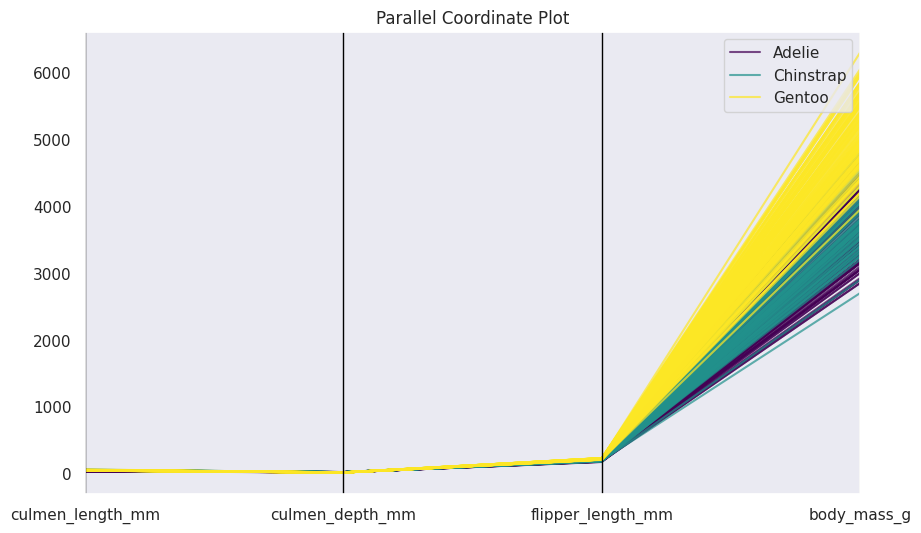

In [ ]:
from pandas.plotting import parallel_coordinates
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
parallel_coordinates(p[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']],
                     'species', colormap='viridis', alpha=0.7)

plt.title('Parallel Coordinate Plot')
plt.show()

# **Penguin Gender Prediction**

## **Data Preprocessing and Model Training (Confusion Matrix Visualization)**
###The code begins by encoding categorical features through one-hot encoding and standardizing numerical features. It then splits the dataset into training and testing sets. Multiple classifiers, including Logistic Regression, Decision Tree, Random Forest, SVM, and KNN, are initialized. For each classifier, the model is trained, predictions are made, accuracy is calculated, and a confusion matrix is visualized using Plotly.

In [ ]:
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


p_encoded = pd.get_dummies(p, columns=['species', 'island'], drop_first=True)


scaler = StandardScaler()
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
p_encoded[numeric_features] = scaler.fit_transform(p_encoded[numeric_features])


X = p_encoded.drop('sex', axis=1)
y = p_encoded['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}


for name, classifier in classifiers.items():
    print(f'\nVisualizing Confusion Matrix and Accuracy for {name}:\n{"="*50}')


    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    fig = ff.create_annotated_heatmap(
        cm, x=['Predicted Female', 'Predicted Male'], y=['Actual Female', 'Actual Male'],
        colorscale='Viridis', font_colors=['white', 'black'], showscale=True
    )


    fig.update_layout(
        title=f'Confusion Matrix - {name} (Accuracy: {accuracy:.2f})',
        template='plotly_dark',
        width=800,
        height=400,
        font=dict(size=16),

    )

    fig.show()



Visualizing Confusion Matrix and Accuracy for Logistic Regression:



Visualizing Confusion Matrix and Accuracy for Decision Tree:



Visualizing Confusion Matrix and Accuracy for Random Forest:



Visualizing Confusion Matrix and Accuracy for SVM:



Visualizing Confusion Matrix and Accuracy for KNN:


## **Classifier Accuracy Comparison Bar Plot**
### Classifier Initialization and Testing: Using familiar classifiers, the code trains, tests, and records accuracy for each. Bar Plot Visualization: Plotly Express generates a colorful bar plot showcasing classifier accuracy, providing a quick overview of their performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import plotly.express as px

p_encoded = pd.get_dummies(p, columns=['species', 'island'], drop_first=True)
p_encoded.fillna(p_encoded.mean(), inplace=True)

scaler = StandardScaler()
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
p_encoded[numeric_features] = scaler.fit_transform(p_encoded[numeric_features])

X = p_encoded.drop('sex', axis=1)
y = p_encoded['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

accuracy_results = []

colors = px.colors.qualitative.Set1

for i, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append({'Classifier': name, 'Accuracy': accuracy, 'Color': colors[i]})

df_accuracy = pd.DataFrame(accuracy_results)
fig = px.bar(df_accuracy, x='Classifier', y='Accuracy', color='Classifier', title='Classifier Accuracy',
             labels={'Accuracy': 'Accuracy Score'}, color_discrete_sequence=df_accuracy['Color'])


fig.update_layout(
    template='plotly_dark',
    xaxis_title='Classifier',
    yaxis_title='Accuracy Score',
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    xaxis_tickfont_size=16,
    yaxis_tickfont_size=16,
    title=dict(text='Classifier Accuracy', font=dict(size=20))
)

fig.show()


<ipython-input-123-a62f245c4e69>:13: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



## **Sample Data Testing for Classifiers**
###Creating a hypothetical penguin sample, the code adjusts and scales the sample data, ensuring compatibility with trained classifiers. Predictions from various classifiers are displayed, demonstrating how each model interprets the unique penguin characteristics.

In [ ]:
sample_data = pd.DataFrame({
    'species_Adelie': [0],
    'species_Chinstrap': [0],
    'species_Gentoo': [1],
    'island_Dream': [0],
    'island_Torgersen': [1],
    'culmen_length_mm': [40.0],
    'culmen_depth_mm': [17.0],
    'flipper_length_mm': [185.0],
    'body_mass_g': [3800.0],
})
sample_data = pd.DataFrame(columns=X_train.columns, data=sample_data)
sample_data[numeric_features] = scaler.transform(sample_data[numeric_features])
print("\nSample Data for Testing:")
print(sample_data)
predictions = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(sample_data)
    predictions[name] = y_pred[0]

print("\nPredictions:")
print(predictions)


Sample Data for Testing:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.732587         -0.08167          -1.143831    -0.509011   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  
0                  0               1             0                 1  

Predictions:
{'Logistic Regression': 'FEMALE', 'Decision Tree': 'FEMALE', 'Random Forest': 'FEMALE', 'SVM': 'FEMALE', 'KNN': 'FEMALE'}
